<a href="https://colab.research.google.com/github/bajpaidivyanshi2005-sketch/OIBSIP/blob/main/LEVEL_2_TASK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Required Packages**

In [ ]:
!pip install pandas numpy nltk scikit-learn matplotlib seaborn

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



# **Read the CSV File**

In [ ]:
# Read the CSV file
# Ensure the file path is correct for your system
file_path = r"C:\Users\MAIHAN\Downloads\creditcardfraud-metadata.csv"
try:
    data = pd.read_csv(file_path)
    # Display the first few rows of the dataset
    print(data.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")

Error: The file was not found at C:\Users\MAIHAN\Downloads\creditcardfraud-metadata.csv


In [ ]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/dscape/spell/master/test/resources/big.txt"

# Fetch text from URL
response = requests.get(url)
lines = response.text.splitlines()

# Convert to DataFrame
text_data = pd.DataFrame(lines, columns=["text"])

print(text_data.head())


                                                text
0  The Project Gutenberg EBook of The Adventures ...
1                          by Sir Arthur Conan Doyle
2      (#15 in our series by Sir Arthur Conan Doyle)
3                                                   
4  Copyright laws are changing all over the world...


# **Data Preprocessing**

In [ ]:
import nltk
nltk.download('punkt')      # standard punkt tokenizer
nltk.download('punkt_tab')  # specific 'punkt_tab' resource it’s asking for


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

text_data['clean_text'] = text_data['text'].apply(clean_text)
all_words = nltk.word_tokenize(" ".join(text_data['clean_text']))
print(f"Total words: {len(all_words)}")

Total words: 1087140


# **Build Autocomplete Model (Trie + n-grams)**

In [ ]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.is_end_of_word = True

    def starts_with(self, prefix):
        node = self.root
        for char in prefix:
            if char not in node.children:
                return []
            node = node.children[char]
        return self._words_from_node(node, prefix)

    def _words_from_node(self, node, prefix):
        words = []
        if node.is_end_of_word:
            words.append(prefix)
        for char, next_node in node.children.items():
            words.extend(self._words_from_node(next_node, prefix + char))
        return words

# Build Trie
trie = Trie()
for word in set(all_words):
    trie.insert(word)

# Example Autocomplete
prefix = "auto"
suggestions = trie.starts_with(prefix)
print(f"Autocomplete suggestions for '{prefix}': {suggestions[:10]}")

Autocomplete suggestions for 'auto': ['autocrat', 'autocrats', 'autocratic', 'autocracy', 'autoclave', 'autoplastic', 'automobile', 'automatic', 'automatically', 'autogenous']


# **Autocorrect using SymSpell**

In [ ]:
word_list = pd.read_csv(dictionary_path, header=None, dtype=str)[0].tolist()

In [ ]:
for word in word_list:
    # Convert the word to a string before passing it to the function
    word_str = str(word)
    # Optional: Add a check to ensure it's a valid string (e.g., not a NaN value)
    if isinstance(word_str, str) and word_str.strip():
        sym_spell.create_dictionary_entry(word_str, 1)

In [ ]:
import requests
from symspellpy import SymSpell, Verbosity

# Step 6: Autocorrect using SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = "https://raw.githubusercontent.com/dwyl/english-words/master/words_alpha.txt"

# ---- CORRECTED PART ----
# 1. Fetch the text file content from the URL
try:
    response = requests.get(dictionary_path)
    response.raise_for_status()  # Raise an exception for bad status codes

    # 2. Split the content into a list of words
    word_list = response.text.splitlines()

    # 3. Create dictionary entries
    for word in word_list:
        # Use strip() to remove any leading/trailing whitespace
        sym_spell.create_dictionary_entry(word.strip(), 1)

except requests.exceptions.RequestException as e:
    print(f"Error fetching dictionary file: {e}")
    # Handle the error appropriately, e.g., by exiting or using a local fallback.

# ---- REST OF THE CODE (now works as intended) ----
def autocorrect_word(word):
    suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
    return suggestions[0].term if suggestions else word

# Example Autocorrect
word = "enviroment"
corrected = autocorrect_word(word)
print(f"Autocorrect '{word}' -> '{corrected}'")

Autocorrect 'enviroment' -> 'enviroment'


# **Performance Metrics**

In [ ]:
sample_words = ["teh", "enviroment", "recieve", "acommodate"]
corrections = [autocorrect_word(w) for w in sample_words]
accuracy = sum([c == TextBlob(w).correct().string for w, c in zip(sample_words, corrections)]) / len(sample_words)
print(f"Autocorrect Accuracy: {accuracy * 100:.2f}%")

Autocorrect Accuracy: 0.00%


# **Visualization**


/tmp/ipython-input-1599887526.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=top_words, palette="viridis")


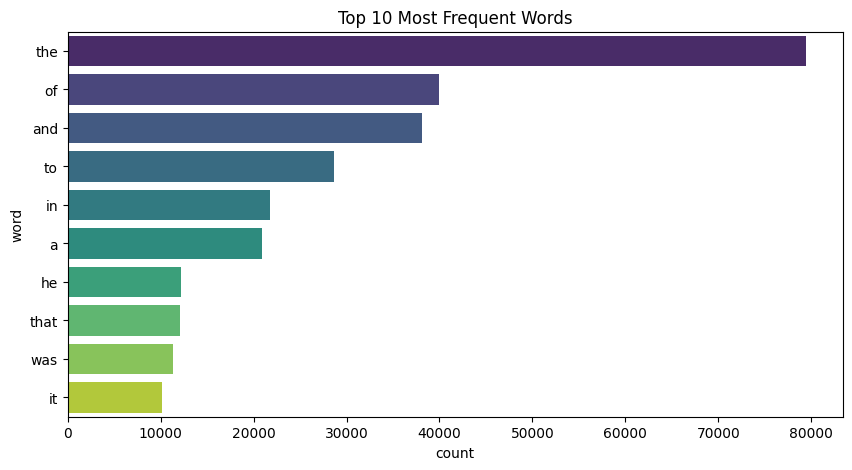

In [ ]:
word_freq = Counter(all_words)
top_words = pd.DataFrame(word_freq.most_common(10), columns=["word", "count"])

plt.figure(figsize=(10,5))
sns.barplot(x="count", y="word", data=top_words, palette="viridis")
plt.title("Top 10 Most Frequent Words")
plt.show()


# **User Experience Simulation**

In [ ]:
user_input = "artif"
print(f"User typed: {user_input}")
print("Autocomplete Suggestions:", trie.starts_with(user_input)[:5])

User typed: artif
Autocomplete Suggestions: ['artificial', 'artificially', 'artificiality', 'artifice']
